# Assignments for "Feature Engineering - Part 1

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

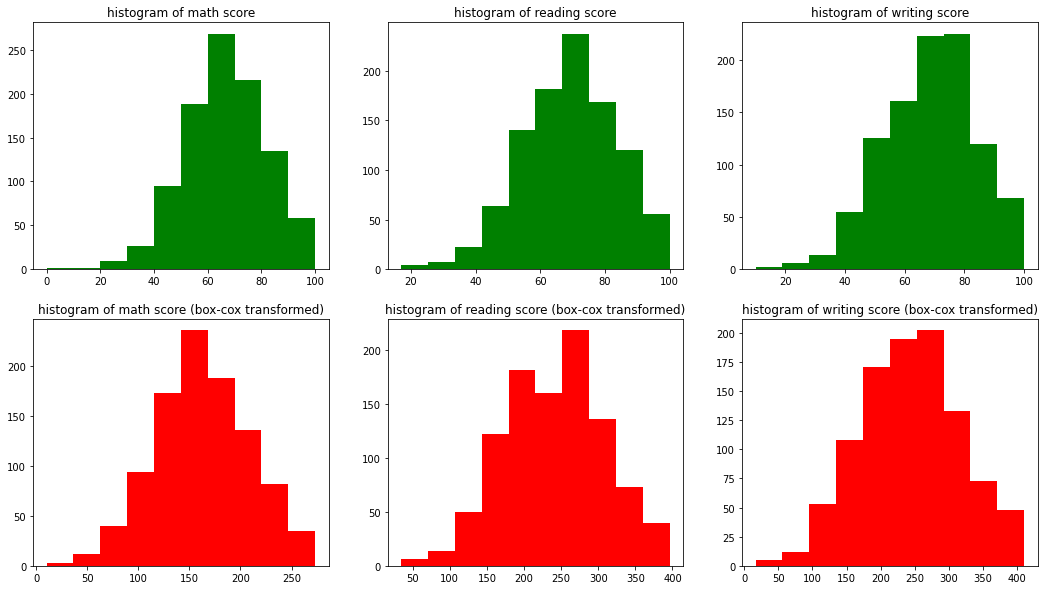

In [5]:
from scipy.stats import boxcox

math_boxcox,_ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(df["reading score"])
writing_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(df["math score"],color = "green")
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(df["reading score"],color = "green")
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(df["writing score"],color = "green")
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox,color = "red")
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox,color = "red")
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox,color = "red")
plt.title("histogram of writing score (box-cox transformed)")

plt.show()

In [6]:
# Not distributed normally. Jarque-Bera and Normal tests also confirm this:

In [7]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [8]:
# After we applied Box-Cox transformation, the distributions come closer to the normal distribution shape. 
#The Jarque-Bera test also indicates that transformed variables are all normally distributed with 5% significance level:

In [9]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200983116596507 and p value is 0.4231412819456758
Normality test statistics is 1.8323076599006014 and p value is 0.40005476451814015
Jarque-Bera test statistics is 4.119778573559654 and p value is 0.12746808151540867
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

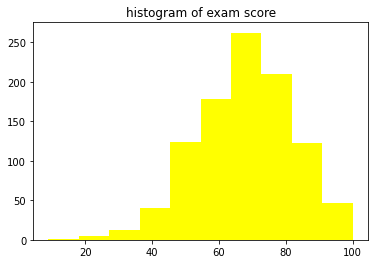

Jarque-Bera test statistics is 15.453387913085164 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [10]:
exam_score = (df["math score"] +df["reading score"] + df["writing score"])/3

plt.hist(exam_score,color = "yellow")
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

In [11]:
#Not normal distribution

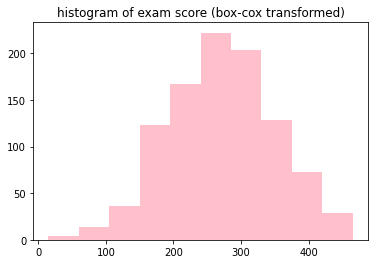

Jarque-Bera test statistics is 2.435398933127944 and p value is 0.29591013563983815
Normality test statistics is 2.779857602227654 and p value is 0.24909303914726255


In [12]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox,color="pink")
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

In [13]:
# After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and 
# Normal tests also confirm this.

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [14]:
df['exam_score'] = exam_score

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,exam_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


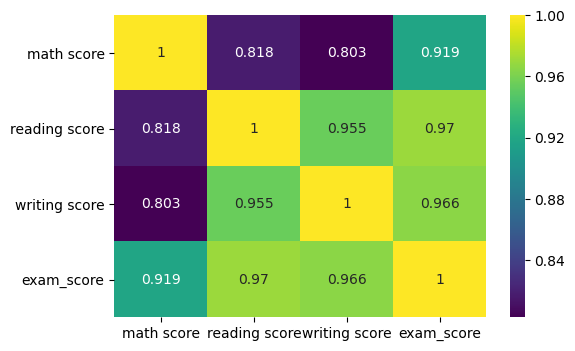

In [16]:
corr_ = df.corr()
plt.figure(figsize=(6,4),dpi=100)
plt.subplot(1,1,1)
sns.heatmap(corr_, annot=True, fmt='.3g',cmap='viridis');

In [17]:
# According to the correlation table, the highest relationship is between exams_score and reading score.

**(4)** Does the test preparation course have an impact on the target variable you created?

In [18]:
from scipy.stats import stats
df_pre=df["test preparation course"].unique()

for var in ["exam_score"]:
    comparison=pd.DataFrame(columns=["group_1","group_2","statistic","p_value"])
    for i in range(0,len(df_pre)):
        for j in range(i+1,len(df_pre)):
            ttest=stats.ttest_ind(df[df["test preparation course"]==df_pre[i]][var],
                                 df[df["test preparation course"]==df_pre[j]][var])
            
            comparison=comparison.append({"group_1":df_pre[i],
                                         "group_2":df_pre[j],
                                         "statistic":ttest[0],
                                         "p_value":ttest[1]}, ignore_index=True)

In [19]:
comparison

,group_1,group_2,statistic,p_value
0,none,completed,-8.390944,1.633780e-16


In [ ]:
#the test preparation course has no effect on the test averages.